### In this notebook I want to demonstrate a couple of cool correlation matrix visualizations.
It is implemented using a famous <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html'>
Boston-housing dataset</a> for simplicity.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
%matplotlib inline
sns.set()

In [48]:
# load a dummy set to play around with
df = load_boston()
print(df.DESCR)

print('\n============================\n')

boston = pd.DataFrame(df.data, columns=df.feature_names)
boston['PRICE'] = df.target  # price in 1000s
boston['CHAS'] = boston['CHAS'].astype('category')
print(f'Making sure that CHAS changed the data type: {boston["CHAS"].dtype}')
print('\n============================\n')
boston.head(3)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## Correlation Matrix variations
Below, I want to show four different techniques to show correlation matrices. It's hard to look at the correlation matrix
filled with just numbers. Here, though, we have a possibility to get a clear image of them.

- normal correlation matrix representation w/o any masks
- triangular correlation matrix - to show half of the values since half of them are duplicates
- column-wise correlation between the target variable & features
- masked method to show the biggest correlations only

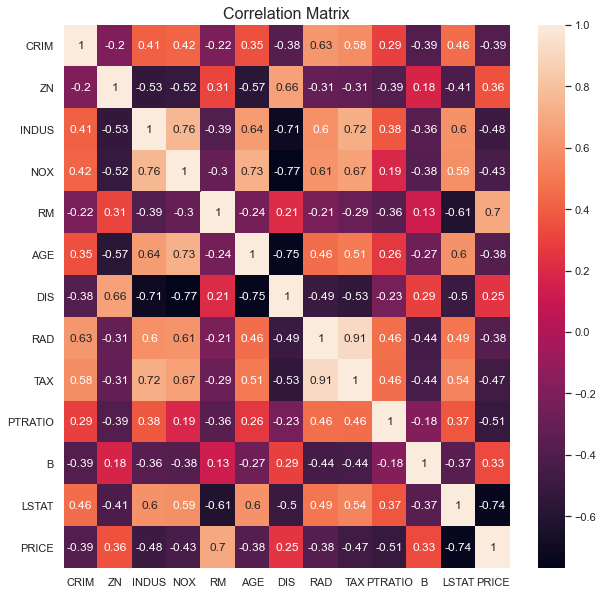

In [3]:
# basic correlation
plt.title('Full Correlation Matrix', fontsize=16)
plt.figure(figsize=(10, 10))
sns.heatmap(boston.corr(), annot=True)  # annotate the correlation coefficients
plt.show()

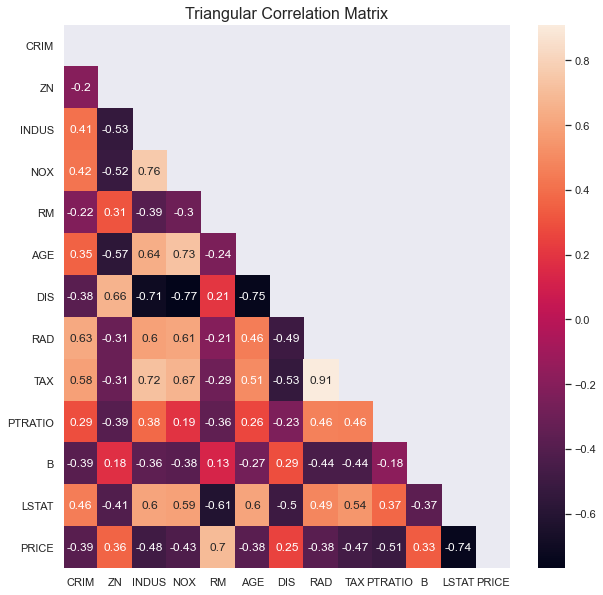

In [61]:
# triangular representation
plt.figure(figsize=(10, 10))
plt.title('Triangular Correlation Matrix', fontsize=16)
triangle = np.triu(boston.corr())
sns.heatmap(boston.corr(), mask=triangle, annot=True)  # annotate the correlation coefficients
plt.show()


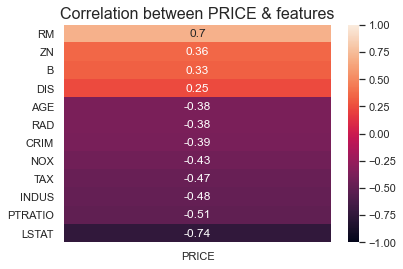

In [62]:
# sorted column representation
plt.title('Correlation between PRICE & features', fontsize=16)
sns.heatmap(boston.corr()[['PRICE']].sort_values(by='PRICE', ascending=False)[1:], annot=True, vmin=-1, vmax=1)
plt.show()

# boston.corr()[['PRICE']].sort_values(by='PRICE', ascending=False)  # sanity check for this particular method

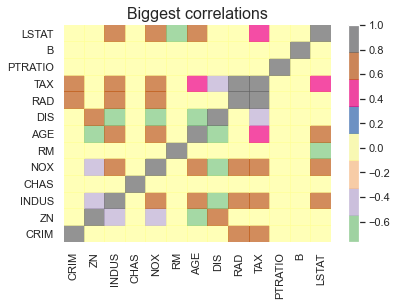

In [63]:
# masked heatmap with corr >= 0.5
plt.title('Biggest correlations', fontsize=16)
corr = np.corrcoef(boston.drop('PRICE', axis=1), rowvar=False)  # correlation among features
corr[np.where(np.abs(corr) < 0.5)] = 0.0  # don't show the correlations < 0.5
heatmap = plt.pcolormesh(corr, cmap='Accent', alpha=0.7)  # create the rectangular grid for colors
heatmap.axes.set_frame_on(False)
heatmap.axes.set_yticks(np.arange(corr.shape[0]) + 0.5, minor=False)
heatmap.axes.set_xticks(np.arange(corr.shape[1]) + 0.5, minor=False)
heatmap.axes.set_xticklabels(df.feature_names, minor=False)  # show feature names for better visualization
heatmap.axes.set_yticklabels(df.feature_names, minor=False)  # show feature names for better visualization
plt.xticks(rotation=90)
plt.colorbar()
plt.show()

In [69]:
# easier version
mask = np.corrcoef(boston, rowvar=False)
mask[np.where(np.abs(mask) < 0.5)] = 0.0
sns.heatmap(boston.corr(), mask=mask, vmin=0.5, vmax=1, annot=True)

print(mask.shape, boston.corr().shape)

(14, 14) (13, 13)
